In [32]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [82]:
# Define user's input variables
age=30
annual_investment=10000

In [34]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [35]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [36]:
#Build the portfolio of the user and then use MCS to forecast the portfolio performance in 5 years

#Get Past 5 Year's Worth of "Bond" and "Stock" Price Data via Alpaca API Call
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.(Can modify this for a more reliable forecasting)
start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information (Choose 1 ticker for Bond and 1 ticker for stocks - index)
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data for "Bond" and "Stock" 
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 10000
).df

# Display sample data
df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-04-27 04:00:00+00:00,285.02,288.2700,284.62,287.05,78438608,430206,286.528977,SPY
2020-04-28 04:00:00+00:00,291.00,291.4000,285.40,285.73,106308551,582616,287.789471,SPY
2020-04-29 04:00:00+00:00,291.59,294.8800,290.41,293.21,118756595,643390,292.698771,SPY
2020-04-30 04:00:00+00:00,291.69,293.3239,288.59,290.48,123003721,650783,290.584103,SPY
2020-05-01 04:00:00+00:00,285.16,290.6572,281.52,282.79,125180028,639987,284.092832,SPY


In [37]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2015-12-01 05:00:00+00:00       15562  108.754152  209.42  210.8200  209.1100   
2015-12-02 05:00:00+00:00       11581  108.684692  210.60  211.0000  208.2300   
2015-12-03 05:00:00+00:00       16801  108.040315  208.90  209.1500  204.7511   
2015-12-04 05:00:00+00:00        9796  108.192232  206.10  209.9700  205.9300   
2015-12-07 05:00:00+00:00        9104  108.460067  209.20  209.7295  207.2000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2015-12-01 05:00:00+00:00  210.68   97858418      337780  209.921410  
2015-12-02 05:00:00+00:00  208.54  108069059      367013  209.563055  
2015-12-03 05:00:00+00:00  205.58  166224154      546768  206.878936  
2015-12-04 05:00:00+00:00  209.66  192878747      556731  208.178631  
2015-12-07 05:00:00+00:00  208.27  102027111      374705  208.276128

In [39]:
# Define the function to store the risk_preference value
def risk_appetite():
    risk_preference = input ("What is your risk preference: High or Mid or Low? ")
    global stockweight
# Set the weights for bond and stock, with the option for the user to choose their risk preference
    if risk_preference == "High":
        stockweight = ((100 - age) + 10)*0.01
    if risk_preference == "Mid":
        stockweight = (100 - age)*0.01
    if risk_preference == "Low":
        stockweight = ((100-age) - 10) * 0.01
    else:
        print("Invalid value, please re-enter!")
        
    print(f"Your risk preference is {risk_preference}")
    print(f"Your stock weight is {stockweight} and your bond weight is {1 - stockweight}")
    return stockweight

risk_appetite()

What is your risk preference: High or Mid or Low?  Low


Your risk preference is Low
Your stock weight is 0.6 and your bond weight is 0.4


0.6

In [40]:
print(stockweight)

0.6


In [41]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns (or can modify to yearstoretirement = desiredretirementage - currentage)
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1-stockweight,stockweight],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [42]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00       15562  108.754152          NaN  209.42   
2015-12-02 05:00:00+00:00       11581  108.684692    -0.001378  210.60   
2015-12-03 05:00:00+00:00       16801  108.040315    -0.007178  208.90   
2015-12-04 05:00:00+00:00        9796  108.192232     0.003244  206.10   
2015-12-07 05:00:00+00:00        9104  108.460067     0.001478  209.20   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2015-12-01 05:00:00+00:00  210.8200  209.1100  210.68   97858418      337780   
2015-12-02 05:00:00+00:00  211.0000  208.2300  208.54  108069059      367013   
2015-12-03 05:00:00+00:00  209.1500  204.7511  205.58  166224154      546768   
2015-12-04 05:00:00+00:00  209.9700  205.9300  209.66  192878747      556731   
2015-12-07 05:00:00+00:00  209.7295  207.2000  208.27  102027111      374705   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  209.921410          NaN  
2015-12-02 05:00:00+00:00  209.563055    -0.010158  
2015-12-03 05:00:00+00:00  206.878936    -0.014194  
2015-12-04 05:00:00+00:00  208.178631     0.019846  
2015-12-07 05:00:00+00:00  208.276128    -0.006630

In [43]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Ha D T Nguyen\Desktop\Avengers-Group-Project\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997392,0.985391,1.018224,0.980855,1.006882,0.988362,1.004335,0.996891,0.997262,0.995258,...,1.001661,1.006516,1.006348,0.989030,0.995739,0.995534,0.999933,1.001196,1.007429,1.001166
2,1.001439,0.985415,1.014165,0.987107,1.005544,0.981979,1.005317,0.999338,1.003537,0.992493,...,1.004631,1.010866,0.999862,0.980739,1.007063,0.988891,1.009176,1.004514,1.013739,0.996271
3,1.006665,0.974514,1.013073,0.976979,0.993508,0.975317,1.018681,1.005526,1.002531,1.006261,...,1.009948,1.001552,1.000129,0.984200,1.007298,0.983076,1.006506,1.003787,1.017151,0.994621
4,1.014615,0.974656,1.020705,0.975127,1.005405,0.974014,1.014068,0.998609,1.015684,0.998432,...,1.014428,0.997502,0.992118,0.985404,0.986618,0.988410,1.013080,1.003117,1.037497,0.991438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.987736,0.917698,1.164466,0.623587,1.676946,1.621572,1.493265,1.218257,1.399560,0.670319,...,1.286773,1.060703,1.515129,1.016671,1.082619,1.232921,1.411179,1.126493,0.926281,1.106928
1257,0.976671,0.928420,1.171066,0.618870,1.698979,1.628117,1.482778,1.232779,1.399519,0.671675,...,1.288514,1.049553,1.523373,1.012382,1.076795,1.236155,1.396332,1.127537,0.923447,1.085723
1258,0.971340,0.923142,1.173669,0.620064,1.710565,1.630389,1.486825,1.221435,1.406988,0.676238,...,1.288736,1.035429,1.518458,0.997077,1.068900,1.229166,1.394760,1.118736,0.918708,1.086856
1259,0.980902,0.923838,1.167365,0.617013,1.710763,1.619083,1.498556,1.195187,1.421237,0.676079,...,1.296407,1.024349,1.518410,0.979573,1.062997,1.230180,1.403538,1.104700,0.912327,1.078759


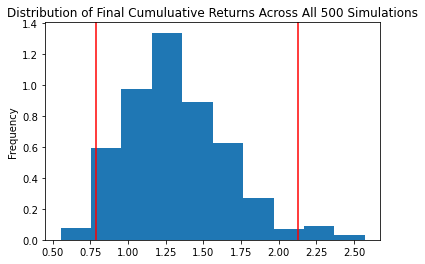

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.320132
std               0.334633
min               0.550929
25%               1.091096
50%               1.282178
75%               1.513763
max               2.572031
95% CI Lower      0.786304
95% CI Upper      2.129787
Name: 1260, dtype: float64


In [78]:
# Get the average return from the statistics
tbl['mean']

1.3201321438920939

In [79]:
#Calculate annualized return
annualised_return = ((1+ tbl['mean']) ** (1/5))-1
print(annualised_return)

0.18332092461816551


In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*annual_investment,2)
ci_upper = round(tbl[9]*annual_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $7863.04 and $21297.87


In [94]:
# Create a function to calculate the future value of the portfolio in "years_to_retirement", assuming that the user contribute
# and equal amount of fund every year. 

def future_value_annuity():
    global retirement_fund
    retirement_age = input ("What is your desired age of retirement? ")
    retirement_age = int(retirement_age)
    years_to_retirement = retirement_age - age
    retirement_fund = round((annual_investment * (((1 + annualised_return) ** years_to_retirement-1)/annualised_return)),2)
    print(f"By the time you are {retirement_age}, you would have ${retirement_fund}")

future_value_annuity()

What is your desired age of retirement?  40


By the time you are 40, you would have $239089.63
